[1842.0, -10.9, -5.6, -4.8, 1.3, 10.7, 15.0, 19.7, 16.8, 10.6, 2.1, -1.3, -6.6, 3.9]
[-10.9  -5.6  -4.8   1.3  10.7  15.   19.7  16.8  10.6   2.1  -1.3  -6.6]


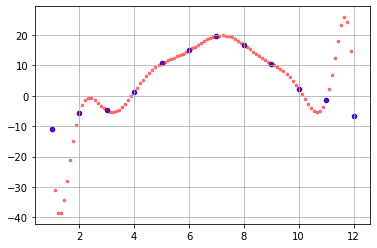

In [50]:
    import csv
    import numpy as np
    import matplotlib.pyplot as plt

    def lagranz(x,y,t):
        z=0
        for j in range(len(y)):
            p1=1; p2=1
            for i in range(len(x)):
                if i==j:
                    p1=p1*1; p2=p2*1   
                else: 
                    p1=p1*(t-x[i])
                    p2=p2*(x[j]-x[i])
            z=z+y[j]*p1/p2
        return z

    with open('10_NN.csv','r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)

        data = {}
        for line in csv_reader:
            key = int(line[0])
            #valuess = list(float(line[1].replace(',','.')),float(line[2].replace(',','.')),float(line[3].replace(',','.')))
            data[key] = []
            mean = 0
            for cnt, val1 in enumerate(line):
                val = float(val1.replace(',','.'))
                if val != 999.9:
                    mean = (mean+val)/(cnt+1) 
                    data[key].append(round(val,1))
                else:
                    data[key].append(round(mean,1))



    print(data[1842])

    x=np.array([1,2,3,4,5,6,7,8,9,10,11,12], dtype=float)
    y=np.array(data[1842][1:-1], dtype=float)
    plt.scatter(x,y,s=20, c='blue', marker="o")
    print(y)
    xnew=np.linspace(np.min(x),np.max(x),100)
    ynew=[lagranz(x,y,i) for i in xnew]

    plt.scatter(xnew,ynew,s=7, c='red', marker="o", alpha = 0.5)
    plt.grid(True)
    plt.show()

In [51]:
z5 = []
for x in data:
    d = data[x][6]
    if d < 50:
        z5.append(d)

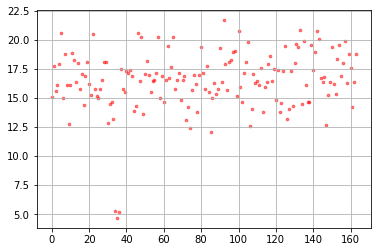

In [22]:
x = np.arange(0,len(z5),1)
y = np.array(z5,dtype = float)
plt.scatter(x,y,s=7, c='red', marker="o", alpha = 0.5)
plt.grid(True)
plt.show()

In [4]:
def nuton(y,l,x):
    p = y[0]
    mnoj = 1
    for i in range(6):
        mnoj *= x-i
        p += l[i]*mnoj
    return p

def rr1(l):
    ans = []
    for i,x in enumerate(l[:-1]):
        ans.append(l[i]-l[i+1])
    return ans

l = []
ans = []


for x in range(6):
    l.append(data[1842+x][1])
for x in range(6):
    ans.append(l)
    l = rr1(l)
for x in ans:
    print(x)    

[-10.9, -5.5, -9.6, -8.7, -11.3, -13.4]
[-5.4, 4.1, -0.9000000000000004, 2.6000000000000014, 2.0999999999999996]
[-9.5, 5.0, -3.5000000000000018, 0.5000000000000018]
[-14.5, 8.500000000000002, -4.0000000000000036]
[-23.0, 12.500000000000005]
[-35.50000000000001]


In [15]:
x1=np.array([1,2,3,4,5,6], dtype=float)
y1=np.array(ans[0], dtype=float)
xn=np.arange(np.min(x1),np.max(x1),0.1)


In [16]:
import numpy as np
def _poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

coef = _poly_newton_coefficient([1,2,3,4,5,6],[-10.9, -5.5, -9.6, -8.7, -11.3, -13.4])

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p

array([-10.9       ,  -8.47186787,  -6.684672  ,  -5.44094363,
        -4.651904  ,  -4.23710938,  -4.124096  ,  -4.24802513,
        -4.551328  ,  -4.98335088,  -5.5       ,  -6.06338663,
        -6.641472  ,  -7.20771238,  -7.740704  ,  -8.22382813,
        -8.644896  ,  -8.99579388,  -9.272128  ,  -9.47286963,
        -9.6       ,  -9.65815537,  -9.654272  ,  -9.59723112,
        -9.497504  ,  -9.36679687,  -9.217696  ,  -9.06331262,
        -8.916928  ,  -8.79163837,  -8.7       ,  -8.65367412,
        -8.663072  ,  -8.73699988,  -8.882304  ,  -9.10351563,
        -9.402496  ,  -9.77808138, -10.225728  , -10.73715713,
       -11.3       , -11.89744288, -12.507872  , -13.10451863,
       -13.655104  , -14.12148438, -14.459296  , -14.61760012,
       -14.538528  , -14.15692587])

[1. 2. 3. 4. 5. 6.] [-10.9  -5.5  -9.6  -8.7 -11.3 -13.4]
[-10.9          5.4         -4.75         2.41666667  -0.95833333
   0.29583333]
[-10.9, -8.471867875, -6.684671999999998, -5.440943625, -4.651903999999999, -4.237109375, -4.1240960000000015, -4.248025125000002, -4.551328000000003, -4.983350875000004, -5.500000000000005, -6.063386625000006, -6.641472000000006, -7.207712375000006, -7.740704000000006, -8.223828125000006, -8.644896000000005, -8.995793875000004, -9.272128000000004, -9.472869625000003, -9.6, -9.658155374999998, -9.654272, -9.597231124999999, -9.497504, -9.366796874999997, -9.217695999999997, -9.063312624999998, -8.916927999999997, -8.791638374999998, -8.700000000000001, -8.653674124999998, -8.663071999999998, -8.736999875000004, -8.882304000000005, -9.10351562500001, -9.402496000000005, -9.77808137500001, -10.22572800000001, -10.737157125000016, -11.300000000000017, -11.897442875000015, -12.507872000000015, -13.104518625000019, -13.655104000000009, -14.12148437500001

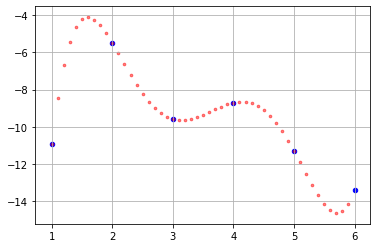

In [17]:
print(x1,y1)


print(coef)
plt.scatter(x1,y1,s=20, c='blue', marker="o")


yn=[newton_polynomial(x1,y1,i) for i in xn]
print(yn)
plt.scatter(xn,yn,s=7, c='red', marker="o", alpha = 0.5)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def _poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)

    a = np.copy(y)
    print(a)
    for k in range(1, m):
        a[m:k:-1] = (a[m:k:-1] - a[k - 1])/(x[m:k:-1] - x[k - 1])
        #print((x[k:m] - x[k - 1]))
        #print(a)
    return a

#coef = _poly_newton_coefficient([1,2,3,4,5,6],[-10.9, -5.5, -9.6, -8.7, -11.3, -13.4])

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    #p = a[0]
    mnoj = (x-x_data[0])
    mnojM1 = [(x-x_data[n])]
    for k in range(1,n+1):
        #p += a[k]*mnoj
        mnoj *= x - x_data[k]
        mnojM1.append(mnoj)

    p = a[n]

    for k in range(1,n+1):
        p += a[n-k+1]*mnojM1[n-k+1]

        

    return p





ans = [-10.9, -5.5, -9.6, -8.7, -11.3, -13.4]
x1=np.array([1,2,3,4,5,6], dtype=float)
y1=np.array(ans, dtype=float)
xn=np.arange(np.min(x1),np.max(x1+0.1),0.1)
plt.scatter(x1,y1,s=20, c='blue', marker="o")
yn=[newton_polynomial(x1,y1,i) for i in xn]
#print(yn)
plt.scatter(xn,yn,s=7, c='red', marker="o", alpha = 0.5)
plt.grid(True)
plt.show()

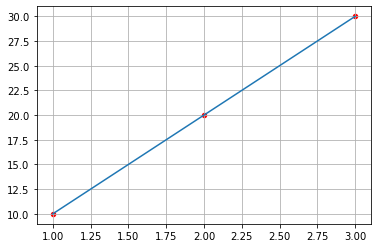

In [48]:
import numpy as np
import matplotlib.pyplot as plt
xi = np.array([1,2,3],dtype = np.float)
yi = np.array([10,20,30],dtype = np.float)
np.sum(np.power(xi,2,dtype=np.float))
A = np.zeros((3,3))
for x in range(3):
    for y in range(3):
        A[x][y] = np.sum(np.power(xi,x+y,dtype=np.float))  #составляем матрицу кэф, возводим в степень xi и суммируем до n
v = np.zeros((3,1))
for i in range(3):
    tmp = np.zeros(len(yi))
    for j in range(3):
        tmp[j] = yi[j] * xi[j] ** i                             #считаем произведение всех yi на xi 
    v[i][0] = np.sum(tmp)     #суммируем yi по n
    
ans = np.linalg.solve(A,v)

def polynom5(ans,x):
    t = 0
    for i in range(len(ans)):
        t += ans[i][0] * (x**i)
    return t

xn=np.arange(np.min(xi),np.max(xi+0.1),0.1)
yn=[polynom5(ans,i) for i in xn]
plt.scatter(xi,yi,s=20, c='red', marker="o")
plt.plot(xn,yn)
plt.grid(True)
plt.show()


In [49]:
def polynom5(ans,x):
    t = 0
    for i in range(len(ans)):
        t += ans[i][0] * (x**i)
    return t

def find_coefficents_for_least_square_method(x_values,y_values):
    xi = np.array(x_values,dtype = np.float)
    yi = np.array(y_values,dtype = np.float)
    matrix_len = len(x_values)
    A = np.zeros((matrix_len,matrix_len))
    for x in range(matrix_len):
        for y in range(matrix_len):
            A[x][y] = np.sum(np.power(xi,x+y,dtype=np.float))  #составляем матрицу кэф, возводим в степень xi и суммируем до n
    v = np.zeros((matrix_len,1))
    for i in range(matrix_len):
        tmp = np.zeros(matrix_len)
        for j in range(3):
            tmp[j] = yi[j] * xi[j] ** i                             #считаем произведение всех yi на xi 
        v[i][0] = np.sum(tmp)     #суммируем yi по n
    
    return np.linalg.solve(A,v)


In [52]:
len1 = len(z5)

approximating_x_axis = []
approximating_y_axis = []
for i in range(1,6):
    num = len1 // 6 * i - 1
    approximating_x_axis.append(num)
    approximating_y_axis.append(z5[num])

([26, 53, 80, 107, 134], [15.8, 15.5, 19.4, 14.1, 14.5])

In [57]:
x = np.arange(0,len(z5),1)
y = np.array(z5,dtype = float)
ans = find_coefficents_for_least_square_method(approximating_x_axis,approximating_y_axis)
xi = np.array(approximating_x_axis,dtype = np.float)
yi = np.array(approximating_y_axis,dtype = np.float)
xn=np.arange(np.min(xi),np.max(xi+0.1),0.1)
yn=[polynom5(ans,i) for i in xn]

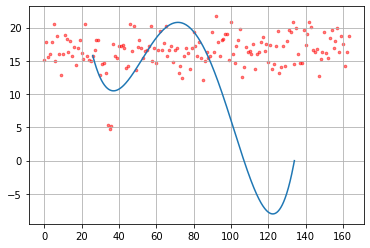

In [58]:
plt.scatter(x,y,s=7, c='red', marker="o", alpha = 0.5)
plt.plot(xn,yn)
plt.grid(True)
plt.show()